# INFERÊNCIA

Este exercício tem como objetivo ser um treino pratico dos conteúdos de manipulação de dados, ánalise explorátoria e teste de hipótese.

## Qual é a relação entre depressão e hábitos saudáveis?

A depressão é um grande problema de saúde publica e é apontado como uma das principais causas de diversas outras doenças de acordo com a organização mundial da saúde (OMS). Existem vários estudos mostrando a relação de hábito saudáveis e diversas doenças, neste desafio iremos avaliar a relação entre boa alimentação e exercícios físicos e sintomas de depressão.

Para realizar essa analise, utilizaremos os dados cedidos pela NHANES (National Health and Nutrition Examination Survey) e iremos assumir que esses dados foram obtidos de forma aleatória da população de interesse.

### Importando bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando dados e obtendo informações:

Como primeiro passo vamos carregar a matéria prima do trabalho, que são os dados, em seguida iremos colher algumas informações do mesmo, como número de linhas, nome e número das colunas e tipos de dados presente. Por fim, criaremos uma nova tabela contedo as duas anteriores. 

In [2]:
#Carregando dados:
csvdemo = pd.read_csv('d:/TERA/Desafio_inferencia/DEMO_PHQ.csv')
csvdemo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [3]:
csvpag = pd.read_csv('d:/TERA/Desafio_inferencia/PAG_HEI.csv')
csvpag.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [4]:
#exibindo informaçoes:
csvdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [5]:
csvpag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [6]:
#Criando uma nova tabela dando merge nas duas anteriores:
demopag = pd.merge(csvdemo, csvpag, on='SEQN', how='left')
demopag.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [7]:
#exibindo informações do novo arquivo para comparar e verificar se não há erros.
demopag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

### Tratamento de váriaveis:

Nesta parte vamos fazer algumas investigações, obter valores nulos, número das frequencias de variaveis qualitativas e criar novas colunas conforme for necessário.

In [8]:
#Exibindo valor nulo atráves da porcentagem:
demopag.isnull().mean().round(4)*100

SEQN                        0.00
DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    0.00
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TO

Nossos valores nulos apresentem menos de 10% nas variáveis que estão presentes, portanto não iremos fazer nenhum tipo de imputação, apenas descarta-los quando utilizarmos as variáveis durante nosso processo de análise.

In [9]:
#Exibindo informações estatisticas:
demopag.drop(columns='SEQN').describe().round()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.0,4836.0,4836.0,4836.0,4836.0,4836.0,4836.0,4836.0,4836.0,5334.0,...,5060.0,5060.0,5060.0,5060.0,5060.0,5060.0,5060.0,5060.0,5060.0,5060.0
mean,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,4.0,4.0,3.0,5.0,5.0,6.0,6.0,6.0,50.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,2.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,12.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,4.0,0.0,2.0,2.0,3.0,4.0,4.0,41.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,5.0,5.0,3.0,4.0,5.0,6.0,6.0,7.0,50.0
75%,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,5.0,5.0,5.0,7.0,8.0,9.0,9.0,9.0,58.0
max,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,...,5.0,5.0,5.0,5.0,10.0,10.0,10.0,10.0,10.0,90.0


In [10]:
#Avaliando a frequencia das variáveis qualitativas:
demopag[['DPQ010',
         'DPQ020',
         'DPQ030',
         'DPQ040',
         'DPQ050',
         'DPQ060',
         'DPQ070',
         'DPQ080',
         'DPQ090']].agg(['value_counts'])
#0.0 - nenhuma vez
#1.0 - Menos de uma semana
#2.0 - Uma semana ou mais
#3.0 - Quase todos os dias
#7.0 - Se recusou a responder
#9.0 - Não Sabe

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


In [11]:
demopag[['RIDRETH1']].value_counts(sort = False)
# 1	Mexican American
# 2	Other Hispanic
# 3	Non-Hispanic White
# 4	Non-Hispanic Black
# 5	Other Race - Including Multi-Racial

RIDRETH1
1           1133
2            164
3           2516
4           1300
5            221
dtype: int64

In [12]:
demopag[['DMDEDUC']].value_counts(sort = False)
#1 - menor que o nono ano
#2 - nono ano completo e médio incompleto
#3 - Ensino médio completo
#4 - Superior incompleto
#5 - Superior completo ou maior
#7 - Se recusou a responder
#9 - Não sabe

DMDEDUC
1           618
2           936
3          1335
4          1498
5           939
7             4
9             4
dtype: int64

In [13]:
demopag[['INDFMINC']].value_counts(sort = False)
#1 - 0-4999
#2 - 5000-9999
#3 - 10000-14999
#4 - 15000-19999
#5 - 20000-24999
#6 - 25000-34999
#7 - 35000-44999
#8 - 45000-54999
#9 - 55000-64999
#10- 65000-74999
#11- Maior ou igual a 75000
#12- Maior que 20000
#13- Menor que 20000
#77- Se recusou a responder
#99- Não sabe

INDFMINC
1.0          190
2.0          281
3.0          440
4.0          412
5.0          426
6.0          678
7.0          535
8.0          485
9.0          297
10.0         278
11.0        1044
12.0          78
13.0          30
77.0          36
99.0          77
dtype: int64

In [14]:
demopag[['ADHERENCE']].value_counts(sort = False)
#1 - Baixo (< 150 min/semana)
#2 - Adequado (150-300 min/semana)
#3 - Acima (> 300 min/semana)

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64

Neste ponto, antes de seguirmos para proxíma etapa, podemos identificar que existem algumas respostas que correspondem a 'não sei/recusou a responder', em uma das variáveis a categoria outros está dividida em dois tipos e a coluna financeira não representa bem seus valores por isso vamos subistituir pelo monto médio dos intervalos que ela representa. Vamos salvar essa alteração em um novo dataframe para não modificar o antigo, mantendo uma cópia do original.

In [15]:
#Substituindo valores e reagrupando variáveis:
substitutos = {
    "DPQ010": {7:np.nan, 9:np.nan},
    "DPQ020": {7:np.nan, 9:np.nan},
    "DPQ030": {7:np.nan, 9:np.nan},
    "DPQ040": {7:np.nan, 9:np.nan},
    "DPQ050": {7:np.nan, 9:np.nan},
    "DPQ060": {7:np.nan, 9:np.nan},
    "DPQ070": {7:np.nan, 9:np.nan},
    "DPQ080": {7:np.nan, 9:np.nan},
    "DPQ090": {7:np.nan, 9:np.nan},
    "RIDRETH1": {5:2},
    "DMDEDUC": {7:np.nan, 9:np.nan},
  "INDFMINC": {1: np.mean([0,4999]), 2: np.mean([5000,9999]), 3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]), 7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]), 11: 75000, 12: np.mean([20000, 90000]),
               13: np.mean([0, 19999]), 77: np.nan, 99: np.nan}
}
db = demopag.replace(substitutos)

In [16]:
#exibindo informações do novo db:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4827 non-null   float64
 2   DPQ020                    4831 non-null   float64
 3   DPQ030                    4829 non-null   float64
 4   DPQ040                    4831 non-null   float64
 5   DPQ050                    4832 non-null   float64
 6   DPQ060                    4831 non-null   float64
 7   DPQ070                    4832 non-null   float64
 8   DPQ080                    4827 non-null   float64
 9   DPQ090                    4834 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5326 non-null   float64
 14  INDFMINC

### Construindo novas variáveis:

Para aváliarmos os casos de depressão, precisaremos criar uma nova coluna (phq9) que receberá a soma de cada valor isolado de sintomas (DPQ0x0) e após isso dividi-las em intervalos (phq_grp) sendo eles: sem sintomas, sintomas leves, moderados, moderadamente severos e severos.

In [17]:
#craindo variável phq9:
db['phq9'] = db.iloc[:,1:10].sum(axis=1, skipna = False)
db['phq9'].head
()

()

In [18]:
#defininco condições de intervalos para criar a phq_grp.
condiçoes = [
    (db['phq9'].isna()),
    (db['phq9'] <= 5),
    (db['phq9'] > 5) & (db['phq9'] <= 9),
    (db['phq9'] > 9) & (db['phq9'] <=14),
    (db['phq9'] >14) & (db['phq9'] <=19),
    (db['phq9'] > 19)
]
resultados = [np.nan, 0, 1, 2, 3, 4]

In [19]:
#craindo a phq_grp
db['phq_grp'] = np.select(condiçoes, resultados)
db['phq_grp'].value_counts(sort = False)

0.0    4013
1.0     489
2.0     201
3.0      73
4.0      23
Name: phq_grp, dtype: int64

Como existem poucos casos nas frequências 4 e 3, ireí criar uma nova váriavel juntando os valores da 4 e 3 na coluna 2(phq_grp2).

In [20]:
#criando a phq_grp2
db['phq_grp2'] = db['phq_grp'].replace([3, 4], 2) 
db['phq_grp2'].value_counts(sort= False)
#0 - sem sintomas;
#1 - Sintomas leves;
#2 - Sintomas moderados a severos. 

0.0    4013
1.0     489
2.0     297
Name: phq_grp2, dtype: int64

## EDA: Análise univariada

Para começar nossa análise, vou dividir as variáveis quantitativas e qualitativas em duas camadas para ficar mais fácil de analisa-las, além de fazer um label de com as legendas para facilitar essas visualizações na hora de plotar gráficos.

In [21]:
var_quant = [
   'RIDAGEYR',
   'INDFMINC',
    'PAG_MINW',
    'HEI2015C1_TOTALVEG',
    'HEI2015C2_GREEN_AND_BEAN',
    'HEI2015C3_TOTALFRUIT',
    'HEI2015C4_WHOLEFRUIT',
    'HEI2015C5_WHOLEGRAIN',
    'HEI2015C7_TOTPROT',
    'HEI2015C8_SEAPLANT_PROT',
    'HEI2015C9_FATTYACID',
    'HEI2015C10_SODIUM',
    'HEI2015C11_REFINEDGRAIN',
    'HEI2015C12_SFAT',
    'HEI2015C13_ADDSUG',
    'HEI2015_TOTAL_SCORE',
    'phq9']


var_quali = [
    'RIAGENDR',
    'RIDRETH1',
    'DMDEDUC',
    'ADHERENCE',
 
    'phq_grp2']

label_quali = {
 "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 2: 'Outro', 3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
  "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio", 4: "Superior \n incompleto", 5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
  "phq_grp2": {0: "Sem sintomas", 1: "Sintomas \n leves", 2: "Sintomas \n moderados-severos"}}

Vou exibir novamente as informações estátisticas, porém dessa vez ireí adicionar dois percentis extra, 95 e 99%. Com eles, posso ter uma ídeia de como estão os valores da extremidade do dataset.

In [22]:
#Exibindo informações estátisticas com mais percentis.
db[var_quant].describe(percentiles = [.25, .50, .75, .95, .99]).round(2)

,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
count,5334.00,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,4799.00
mean,45.09,40787.68,471.77,3.20,1.81,2.49,2.36,1.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97,2.73
std,20.15,24247.24,780.35,1.47,2.14,1.95,2.17,1.92,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32,3.73
min,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
25%,27.00,17499.50,35.00,2.06,0.00,0.45,0.00,0.00,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03,0.00
50%,43.00,39999.50,210.00,3.22,0.06,2.32,2.08,1.03,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51,1.00
75%,62.00,69999.50,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17,4.00
95%,81.00,75000.00,1863.05,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19,10.00
99%,85.00,75000.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86,17.00
max,85.00,75000.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


Na variável PAG_MINW o intervalo entre o maxímo e o de 99% existe uma discrepancia muito grande. Como essa variável remete a minutos de atividade física por semana, o valor maxímo pe de aproximadamente 10800 enquanto o percentil que divide nossa amostra em 99% é aproximadamente 3600 minutos. Ora, uma semana possui 10080 minutos, sendo assim é impossível que tenha algum valor acima dessa faixa, portanto vou criar uma nova variável e truncar todos os valores em 3600.

In [23]:
#truncando o valor da variavel de tempo em 3600
db['PAG_MINW_trunc'] = np.where(db['PAG_MINW'] > 3600, 3600, db['PAG_MINW'])

db[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,454.86
std,780.35,663.05
min,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
95%,1863.05,1863.05
99%,3672.06,3600.00
max,10777.83,3600.00


Uma váriavel em minutos é muito disperça, por isso vou criar outra com horas semanais. 

In [24]:
#criando uma nova variavel de horas semanais
db['PAG_HRW'] = db['PAG_MINW_trunc']/60
db['PAG_HRW'].head()

0     0.000000
1     4.411855
2    22.555812
3    16.857968
4    28.819092
Name: PAG_HRW, dtype: float64

Vamos checar a distribuição de nossas váriaveis quantitativas:

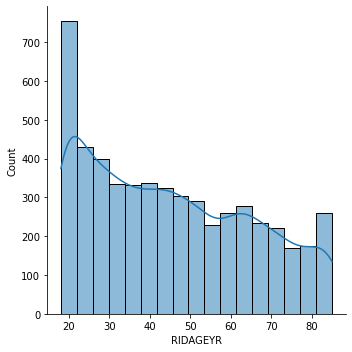

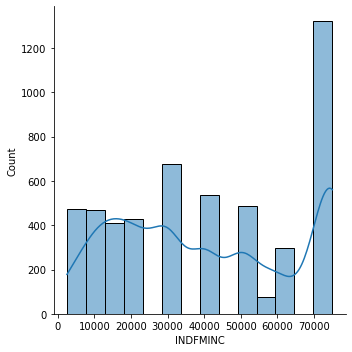

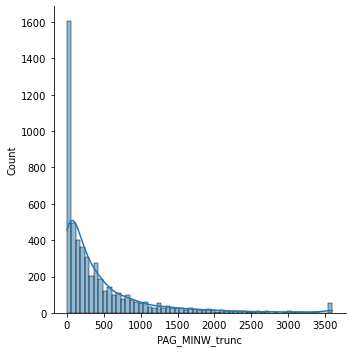

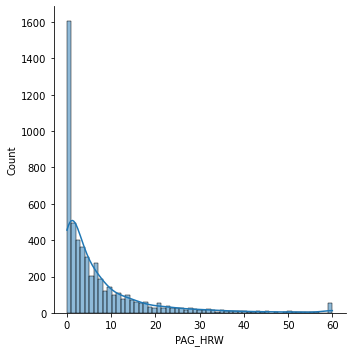

In [25]:
sns.displot(db, x='RIDAGEYR', kde=True)
sns.displot(db, x='INDFMINC', kde=True)
sns.displot(db, x='PAG_MINW_trunc', kde=True)
sns.displot(db, x= 'PAG_HRW', kde=True)
plt.show()

As váriaveis de hora e minutos ainda não estão com uma boa visualização de distribuição. Para melhorar isso, vou criar mais uma variavel utilizando uma tecnica de aplicar o logáritomo sobre os valores. Dessa forma, vou conseguir mudar a escala da visualização. Como temos o vários valores zero e o log de zero é matemáticamente indefinido irémos somar uma unidade em todas as nossas linhas na hora de aplicar o log. (Não existe nenhum número que elevado a outro seja igual a zero)

In [26]:
#criando uma pag_hrw com o log
db['PAG_HRW_log'] = np.log(db['PAG_HRW'] +1)
db['PAG_HRW_log'].head()

0    0.000000
1    1.688592
2    3.159373
3    2.882450
4    3.395149
Name: PAG_HRW_log, dtype: float64

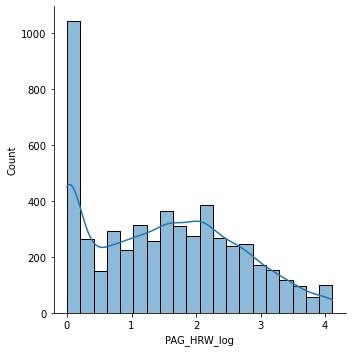

In [27]:
sns.displot(db, x='PAG_HRW_log', kde=True)
plt.show()

Para o restante das váriaveis, vou criar uma função para fazer os graficos:

In [28]:
def grafbar_prop(data, variavel):
    (data[[variavel]]
     .value_counts(normalize=True, sort=False)
     .rename('proportion')
     .reset_index()
     .pipe((sns.barplot, 'data'), x= variavel, y= 'proportion' ))
    plt.ylim(0,1)
    plt.show()

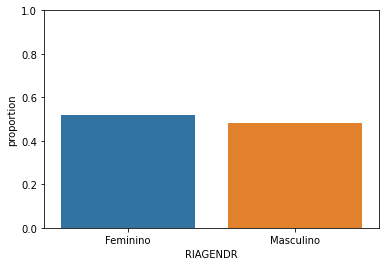

In [29]:
#Grafico de gênero
grafbar_prop(db.replace(label_quali), 'RIAGENDR')

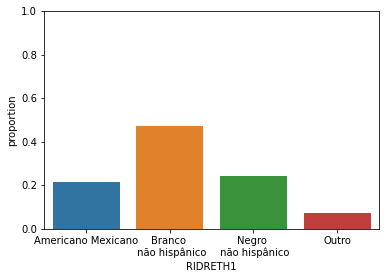

In [30]:
#grafico de raça/etnia
grafbar_prop(db.replace(label_quali), 'RIDRETH1')

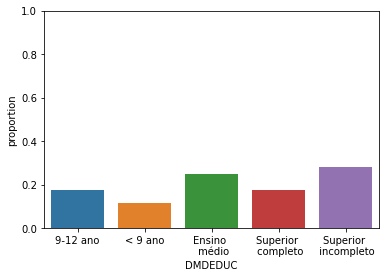

In [31]:
#grafico de nível de educação
grafbar_prop(db.replace(label_quali), 'DMDEDUC')

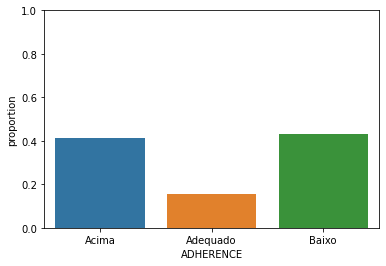

In [32]:
#Grafico de nível de atividade física
grafbar_prop(db.replace(label_quali), 'ADHERENCE')

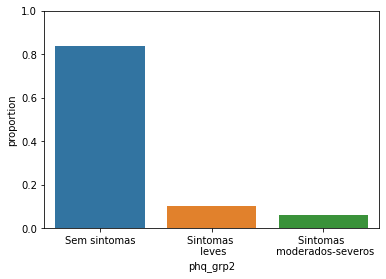

In [33]:
#grafico de nível de sintomas
grafbar_prop(db.replace(label_quali), 'phq_grp2')

### Análise Bivariada e testes de hipóteses:

Durante essa etapa, vou criar graficos e realizar testes de hipoteses para tentarmos ver se existe alguma ligação entre duas variáveis. 

Como iremos criar vários boxplot, ireí criar uma função para fazer comparativos com a coluna phq_grp2. 

In [34]:
#função para criar boxplot comparativo com phq_grp2
def grafbox_grp(data, variavel, label):
    if label == '': label = variavel
    sns.boxplot(x='phq_grp2', y=variavel, data=data)
    plt.ylabel(label)
    plt.show()

### Perfil com maior incidencia de depressão:

#### Sintomas x idade

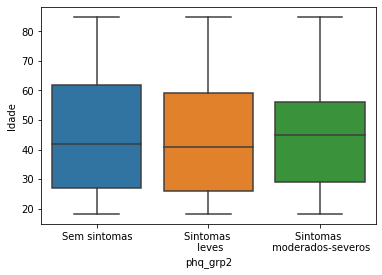

In [35]:
grafbox_grp(db.replace(label_quali), "RIDAGEYR", "Idade")

Para realizar nossos testes de hípoteses vamos utilizar o teste F da ANOVA. O teste f serve para avaliar a variabilidade entre as médias é maior que a variabilidade das observações dentro dos grupos. Se essa proporção for grande, podemos determinar que nem todas as médias são iguais.

Para estes casos testaremos a seguinte hipotese nula: "Não existe diferença entre os grupos de depressão com relação à média de idade" e a hipotese alternativa "existe pelo menos uma diferença entre as médias de idade entre os grupos de sintomas depressão".

In [36]:
from scipy.stats import f_oneway

db_aux = db[['phq_grp2', 'RIDAGEYR']].dropna()

stats, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]['RIDAGEYR'],
                    db_aux[(db_aux.phq_grp2 == 1)]['RIDAGEYR'],
                    db_aux[(db_aux.phq_grp2 == 2)]['RIDAGEYR'])

print('stats: %.3f, p: %.3f' % (stats, p))

stats: 1.002, p: 0.367


Para essa análise, temos o valor de p em 0,367. Isso significa que se fossemos observar nossa população, temos a chance aproximada de 36,7% de chance de não encontrarmos diferença entre os grupos de sintomas em relação a média de idade. Portanto, não podemos rejeitar a hípotese nula. Sendo assim, não conseguimos detectar uma diferença estatisticamente significativa entre os elementos testados.

#### Renda familiar x sintomas:

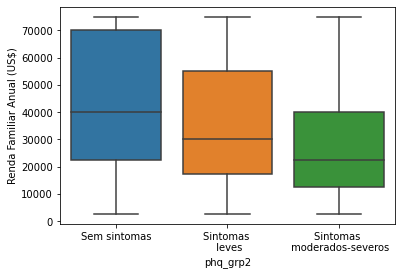

In [37]:
grafbox_grp(db.replace(label_quali), 'INDFMINC', 'Renda Familiar Anual (US$)')

Teste de hípotese:
   
   Hípotese nula (H0): "Não existe diferença entre os grupos de depressão em relação a renda familiar anual"

In [38]:
from scipy.stats import f_oneway

db_aux = db[['phq_grp2', 'INDFMINC']].dropna()

stats , p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]['INDFMINC'],
                     db_aux[(db_aux.phq_grp2 == 1)]['INDFMINC'],
                     db_aux[(db_aux.phq_grp2 == 2)]['INDFMINC'])

print('stats: %.3f , p: %.3f ' % (stats, p))

stats: 50.376 , p: 0.000 


Nesta análise p é aproximadamente zero. Por isso temos evidencias estatisticas suficientes para rejeitar H0. Neste caso, vamos testar a nosssa hipótese alternativa (H1: "Existe pelo menos uma diferença entre os grupos de depressão e a média de renda familiar.").
Para esse teste, vamos utilizar de outra ferramenta que é chamada pairwise_tukey. Semelhante ao teste F da ANOVA, ele irá comparar a média de variancia entre os grupos da amostra, entretanto, ele é uma ferramente multi-teste e examinará caso por caso e nos mostrará onde está a diferença com significancia estátistica.

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['INDFMINC'], db_aux['phq_grp2'])

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   0.0    1.0  -5537.0284 0.001  -8305.9614  -2768.0954   True
   0.0    2.0 -13537.8408 0.001 -16971.2327 -10104.4489   True
   1.0    2.0  -8000.8124 0.001 -12223.0265  -3778.5983   True
--------------------------------------------------------------


Como resultado do teste podemos (p = 0.001) rejeitar H0 para os três casos, sendo assim temos quê:
 
1 - A renda média do grupo 0 é diferente do grupo 1;
 
2 - A renda média do grupo 0 é diferente do grupo 2;
 
3 - A renda média do grupo 1 é diferente do grupo 2.

#### Atividade física semanal x sintomas

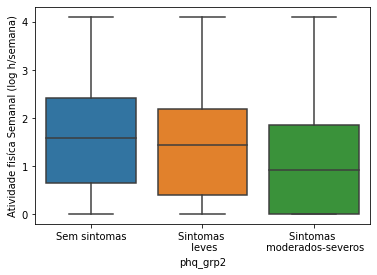

In [49]:
grafbox_grp(db.replace(label_quali), 'PAG_HRW_log', 'Atividade fisíca Semanal (log h/semana)')

Teste de hipoteses:
  
       H0: "Não existe diferença no grupo de sintomas em relação a horas de atividades físicas semanais"

In [52]:
from scipy.stats import f_oneway

db_aux = db[['phq_grp2', 'PAG_HRW_log']].dropna()

stats, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]['PAG_HRW_log'],
                    db_aux[(db_aux.phq_grp2 == 1)]['PAG_HRW_log'],
                    db_aux[(db_aux.phq_grp2 == 2)]['PAG_HRW_log'])

print('stats: %.3f, p: %.3f' % (stats, p))

stats: 31.185, p: 0.000


Nosso p-valor é aproxiamdamente zero, portanto podemos rejeitar a hipotese nula de que não existe diferença no grupo de sintomas em relação a horas de atividades físicas semanais. Vamos agora investigar onde existe essa diferença.

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'], db_aux['phq_grp2'])

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.1483 0.0157 -0.2739 -0.0226   True
   0.0    2.0  -0.5119  0.001 -0.6697 -0.3542   True
   1.0    2.0  -0.3636  0.001 -0.5566 -0.1707   True
----------------------------------------------------


Neste caso podemos rejeitar a hipotese nula em dois casos, mas não temos evidencias estatística para rejeita-las em todos. Obtemos o seguinte resultado em nossa análise:

1 - Não temos evidencias estatísticas para rejeitar a hípotese nula nesse caso, sendo assim podemos dizer que não existe evidencias para dizer que a média de atividade física do grupo sem sintomas (0.0) seja diferente da médias das pessoas com sintomas leves, p = 15,7%

2 - Como o p-valor é de 0.001 podemos rejeitar H0, sendo assim existe diferença no grupo sem sintomas (0.0) e moderados a severos (2.0) entre a média de atividade física por semana.

3 - Também rejeitamos H0 neste caso, pois nosso p-valor também é de 0.001, por isso existe diferença entre o grupo de sintomas leves (1.0) e moderados a severos (2.0) em relação a média de horas de exercícios semanais.

#### Alimentação Saúdavel x Sintomas:

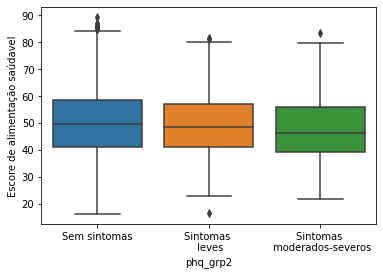

In [44]:
grafbox_grp(db.replace(label_quali), 'HEI2015_TOTAL_SCORE', 'Escore de alimentação saúdavel')

Teste de Hipotese:
    
    H0: "Não existe diferença no grupo de depressão em relação a média de alimentação saúdavel."

In [46]:
from scipy.stats import f_oneway

db_aux = db[['phq_grp2', 'HEI2015_TOTAL_SCORE']].dropna()

stats, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]['HEI2015_TOTAL_SCORE'],
                    db_aux[(db_aux.phq_grp2 == 1)]['HEI2015_TOTAL_SCORE'],
                    db_aux[(db_aux.phq_grp2 == 2)]['HEI2015_TOTAL_SCORE'])

print('Stats: %.3f, p: %.3f' % (stats, p ))

Stats: 7.119, p: 0.001


Podemos rejeitar H0, então existe pelo menos uma diferença entre as médias. Vamos usar o multi-teste para verificar onde existe uma diferença estatistica significativa.

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'], db_aux['phq_grp2'])

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.1066 0.1546 -2.5111  0.2978  False
   0.0    2.0  -2.5846 0.0017  -4.348 -0.8211   True
   1.0    2.0  -1.4779 0.2437 -3.6364  0.6805  False
----------------------------------------------------


Para essa análise, o valor p foi diferente nos 3 casos. Sendo assim temos:
 
    1 - Não temos evidencia estatística para negar H0 comparando sem sintomas (0.0) com sintomas leves (1.0), p = 15,6%;
     
    2 - Podemos dizer que existe diferença no grupo de sintomas (entre sem sintomas e sintomas moderados a severos) em relação a média de alimentação saúdavel, p = 0,17%;
     
    3- Não temos evidência estatística para Negar a hipotese nula comparando sintomas leves (1.0) e sintomas moderados a severos (2.0), p = 24,37%.

### Perfil de hábitos saúdaveis:

#### Alimentação saúdavel x Exercícios físicos

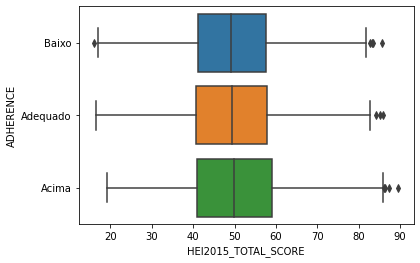

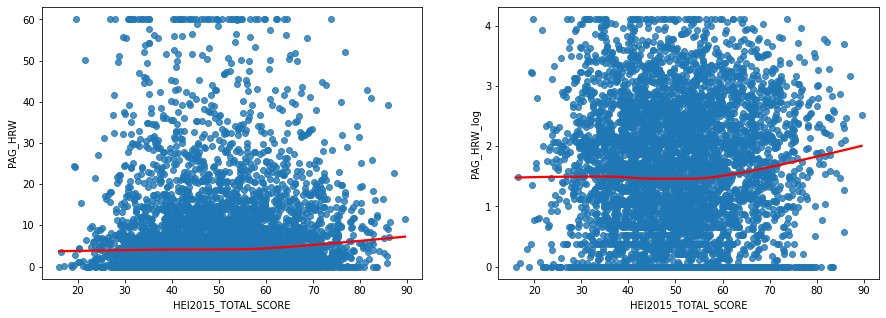

In [54]:
sns.boxplot(y="ADHERENCE", 
            x="HEI2015_TOTAL_SCORE", 
            orient="h",
            data=db.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = db,
            ax = ax[0])

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW_log', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = db,
            ax = ax[1])
plt.show()

Teste de Hipótese:

    H0: "Não existe diferença no grupo de atividade física sobre a média de escore de alimentação saúdavel".

In [55]:
from scipy.stats import f_oneway

db_aux = db[["ADHERENCE", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.ADHERENCE == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 3)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.122, p=0.016


Como nosso p é menor que 0.05 (p = 0.016), podemos rejeitar a hipotese nula. Vamos rodar o multi-teste para verifica-la.

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'], db_aux['ADHERENCE'])

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.3937 0.7031  -0.805 1.5924  False
   1.0    3.0   1.0773  0.012  0.1931 1.9616   True
   2.0    3.0   0.6837  0.378 -0.5186 1.8859  False
---------------------------------------------------


Temos apenas um caso em que podemos rejeitar a hípotese nula. Nossos resultados apresentam o seguinte:

    1 - No primeiro (baixa atividade física[1.0] e adequado[2.0]) resultado não temos evidências para negar H0, nosso p-valor nos diz que temos aproximadamente 70% de chance de não notarmos a diferença que estamos procurando.
    
    2 - No segundo caso (baixa atividade física[1.0] e alta atividade física[2.0]) podemos rejeitar a hipótese nula, já que nosso p-valor é de apenas 1,2%.
    
    3 - No terceiro caso (atividade adequada [2.0] e alta atividade [3.0] não temos evidências para negar a hipótese nula,    nosso p-valor nos indica que temos aproximadamente 38% de chance de não encontramos essa diferença na amostra. 

#### Hábitos Saúdavies x Gênero

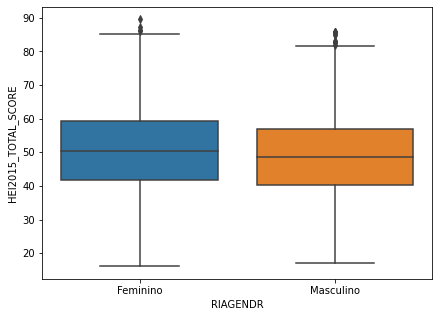

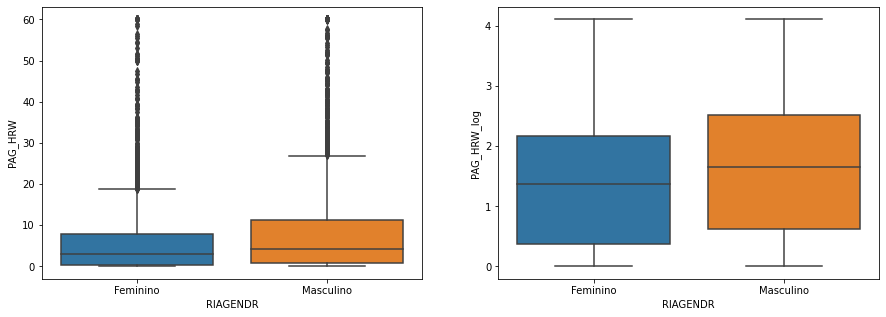

In [57]:
plt.figure(figsize=(7,5))
sns.boxplot(x="RIAGENDR", 
            y="HEI2015_TOTAL_SCORE", 
            data=db.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW", 
            data=db.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW_log", 
            data=db.replace(label_quali),
            ax = ax[1])
plt.show()

Teste de hipótese:
    
    H0: "Não existe diferença entre os gêneros na média de escore de alimentação Saúdavel."
        "Não existe diferença entre os gêneros na média de tempo de pratíca de exércicios físicos." 

In [58]:
from scipy.stats import f_oneway

db_aux = db[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIAGENDR == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=27.216, p=0.000


In [60]:
from scipy.stats import f_oneway

db_aux = db[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIAGENDR == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=50.329, p=0.000


Em ambos os casos podemos rejeitar a hípotese nula, assumindo que existe uma difença entre as médias e como não temos mais de duas váriaveis, não precisamos aplicar o multi-teste.

#### Hábitos saúdaveis e raça:

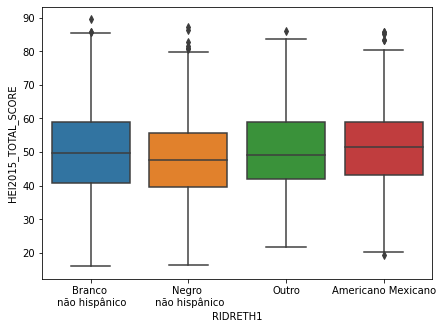

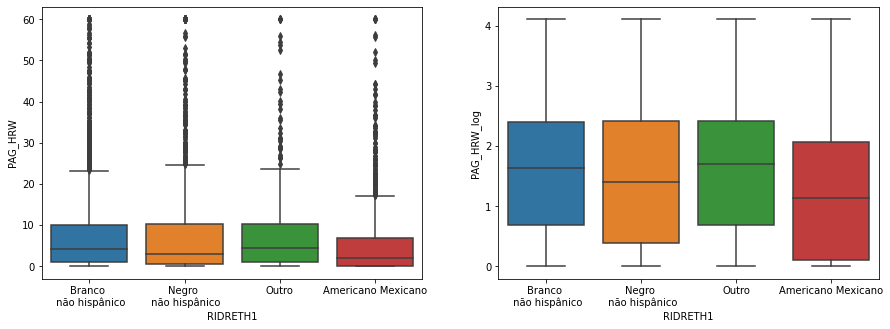

In [61]:
plt.figure(figsize=(7,5))
sns.boxplot(x="RIDRETH1", 
            y="HEI2015_TOTAL_SCORE", 
            data=db.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW", 
            data=db.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW_log", 
            data=db.replace(label_quali),
            ax = ax[1])
plt.show()

Por fim, vamos análisar qual raça/etnia possuí a alimentação mais saúdavel e tem a prática de exercícios mais adequadas.
Vamos análisar as seguintes hípoteses nulas:
      
      h0: "Não existe difernça entre as média de escore de alimentação saúdavel entre os grupos de raça/etnia."
       
      h0: "Não existe diferença entre as médias de tempo de exércicíos nos grupos étnicos/raciais.  

In [62]:
from scipy.stats import f_oneway

db_aux = db[["RIDRETH1", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=11.860, p=0.000


Como nosso p-valor é aproximadamente zero, portanto vou realizar o multiteste para avaliar onde existe a diferença.

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.964  0.556 -2.8709   0.943  False
     1      3  -1.0955 0.0718 -2.2542  0.0632  False
     1      4  -2.9767  0.001 -4.2992 -1.6541   True
     2      3  -0.1315    0.9 -1.8988  1.6357  False
     2      4  -2.0127 0.0302 -3.8914  -0.134   True
     3      4  -1.8812  0.001 -2.9928 -0.7696   True
----------------------------------------------------


- Entre o grupo 1 e 2, não temos evídencias para rejeitar h0;
- Entre os grupos 1 e 3, nçao temos evídencias para rejitar h0;
- Entre os grupos 1 e 4, podemos rejeitar h0;
- Entre os grupos 2 e 3, não temos evídencias para rejeitar h0;
- Entre os grupos 2 e 4, podemos rejeitar h0;
- Entre os grupos 3 e 4, podemos rejeitar h0.

Com isso podemos dizer que, entre os grupos étnicos/raciais apenas o grupo 4 tem a média de escore de alimentação diferente dos demais, com alguma significancia estátistica. 

In [64]:
from scipy.stats import f_oneway

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=25.845, p=0.000


Também podemos rejeitar h0 em relação a média de atívidade físca, já que nosso p valor é aproximadamente zero. Verificando com o multiteste:

In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.3757  0.001  0.2016  0.5499   True
     1      3   0.3502  0.001  0.2444   0.456   True
     1      4    0.229  0.001  0.1082  0.3498   True
     2      3  -0.0255    0.9 -0.1869  0.1359  False
     2      4  -0.1467 0.1241 -0.3183  0.0248  False
     3      4  -0.1212 0.0116 -0.2227 -0.0197   True
----------------------------------------------------


- Podemos rejeitar h0 no grupo 1 e demais valores;
- Não podemos rejeitar h0 nos grupos 2 e 3, e 2 e4;
- Podemos rejeitar h0 nos grupos 3 e 4.

Portanto, podemos afirmar que entre as variaveis de tempo de atividade física e etnia/raça, Podemos assumir que a média do grupo 1 seja diferente das dos demais, a média do grupo 3 é diferente do grupo 3 e quatro, e não temos evidencias para dizer que a média de tempo é diferente do grupo 2 em relação ao grupo 3 e 4.
